In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sbn
import pandas as pd
import csv

# Part I (50%)

## 1.1. Linear Regression

### 1.1.1. (5 marks)

In [2]:
def change_basis_vector(vector,degree): #function gets a vector as a parameter and returns a modified vector with dimensions set by the degree parameter
    if degree == 1:
        return np.ones(vector.shape) 
    output = np.ones(vector.shape)
    if degree == 2:
        return np.append(output,vector,axis=1)
    output = np.append(output,vector,axis=1)
    for i in range(2,degree):
        output = np.append(output,vector**i,axis=1)
    return output

In [3]:
class LinearRegressionMSE: #Linear Regression model implemented as a class
    def __init__(self):
        self.coef_ = [] #coefficients that will be set based on the input dimensions 
    def fit(self,x,y):
        self.coef_ = np.longdouble((np.linalg.inv(x.T@x)@x.T)@y) #the derived solution for the MSE loss function
    def predict(self,x):
        return x@self.coef_ #returns the prediction based on the input data
    def mse(self,pred,y):
        return np.sum((abs(pred-y)**2))/pred.shape[0] #calculates the mean squared error between the passed predictions and labels

In [4]:
x = np.asarray([[1],[2],[3],[4]])
y = np.asarray([[3],[2],[0],[5]])

lin_reg_1 = LinearRegressionMSE() #class initialisation
lin_reg_1.fit(change_basis_vector(x,1),y) #model fitting with the transformed input
pred_1 = lin_reg_1.predict(change_basis_vector(x,1)) #prediction with the input used for training
mse_1 = lin_reg_1.mse(pred_1,y) #training MSE

lin_reg_2 = LinearRegressionMSE()
lin_reg_2.fit(change_basis_vector(x,2),y)
pred_2 = lin_reg_2.predict(change_basis_vector(x,2))
mse_2 = lin_reg_2.mse(pred_2,y)

lin_reg_3 = LinearRegressionMSE()
lin_reg_3.fit(change_basis_vector(x,3),y)
pred_3 = lin_reg_3.predict(change_basis_vector(x,3))
mse_3 = lin_reg_3.mse(pred_3,y)

lin_reg_4 = LinearRegressionMSE()
lin_reg_4.fit(change_basis_vector(x,4),y)
pred_4 = lin_reg_4.predict(change_basis_vector(x,4))
mse_4 = lin_reg_4.mse(pred_4,y)

In [36]:
def get_pol(x,model): #this function was used for the purposes of plotting
    output = 0
    for i in range(model.coef_.shape[0]): #the loop iterates over the model's coefficients and calculates the output
        output += model.coef_[i]*x**i
    return output

### 1.1.1. a) Plot

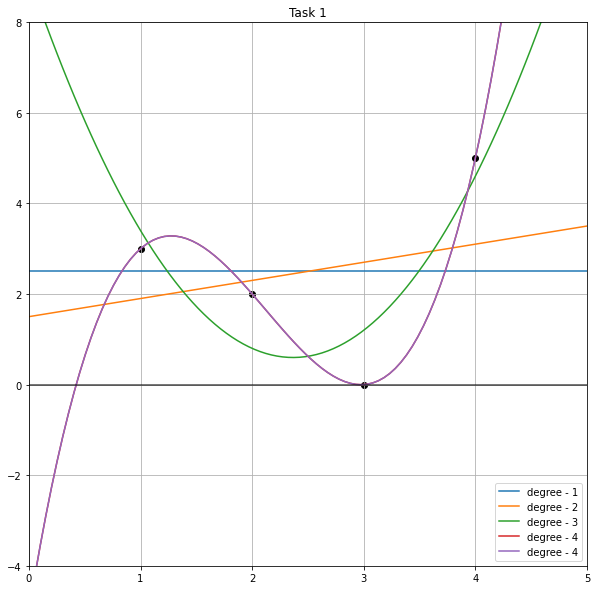

In [565]:
x_axis = np.linspace(0,5,100)

plt.figure(figsize=[10,10])
plt.scatter(x,y,color="k")
plt.plot(x_axis,get_pol(x_axis,lin_reg_1),label="degree - 1")
plt.plot(x_axis,get_pol(x_axis,lin_reg_2),label="degree - 2")
plt.plot(x_axis,get_pol(x_axis,lin_reg_3),label="degree - 3")
plt.plot(x_axis,get_pol(x_axis,lin_reg_4),label="degree - 4")
plt.plot(x_axis,get_pol(x_axis,lin_reg_4),label="degree - 4")
plt.grid()
plt.xlim(0,5)
plt.ylim(-4,8)
plt.axhline(0,color='k',alpha=0.7)
plt.title("Task 1")
plt.legend()
plt.show()

### 1.1.1. b) Equations for k = 1,2,3

for k = 1, y = 2.5 <br>
for k = 2, y = 1.5 + 0.4x <br>
for k = 3, y = 9 - 7.1x + 1.5x^2

### 1.1.1. c) MSE for k = 1,2,3,4

In [568]:
print(f"Mean Square Errors for 1,2,3,4 degree polynomials (respectively): {mse_1},{mse_2},{mse_3},{mse_4}")

Mean Square Errors for 1,2,3,4 degree polynomials (respectively): 3.25,3.05,0.8000000000000008,1.39705877919448e-23


### 1.1.2. (10 marks)

### 1.1.2. a) Plot linear regression plots with different degrees (2,5,10,14,18)

In [587]:
sample_x = np.random.random(30) #30 randomly generated points in the range 0 <= x <= 1

def func_x(x): #the implementation of the sine function in the task
    return np.sin(2*np.pi*x)**2
func_x_vectorised = np.vectorize(func_x) #the sine function was vectorised for easier application on vectorised data

y = func_x_vectorised(sample_x)+np.random.normal(0,0.07,30) #the output of the g(x) function provided in the task 

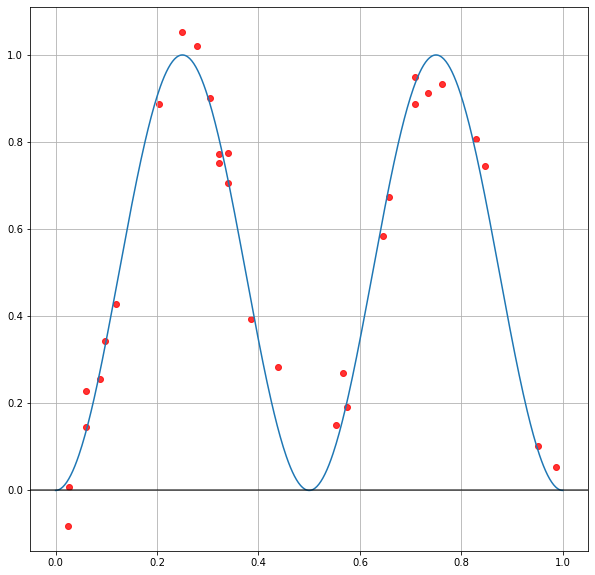

In [588]:
x_axis = np.linspace(0,1,500)
plt.figure(figsize=[10,10])
plt.plot(x_axis,np.sin(2*np.pi*x_axis)**2)
plt.axhline(0,color="k",alpha=0.7)
plt.scatter(sample_x,y,color="r",alpha=0.8)
plt.grid()
plt.show()

In [591]:
x = sample_x.reshape(-1,1)
y = y.reshape(-1,1)

lin_reg_2 = LinearRegressionMSE()
lin_reg_2.fit(change_basis_vector(x,2),y)
pred_2 = lin_reg_2.predict(change_basis_vector(x,2))
mse_2 = lin_reg_2.mse(pred_2,y)

lin_reg_5 = LinearRegressionMSE()
lin_reg_5.fit(change_basis_vector(x,5),y)
pred_5 = lin_reg_5.predict(change_basis_vector(x,5))
mse_5 = lin_reg_5.mse(pred_5,y)

lin_reg_10 = LinearRegressionMSE()
lin_reg_10.fit(change_basis_vector(x,10),y)
pred_10 = lin_reg_10.predict(change_basis_vector(x,10))
mse_10 = lin_reg_10.mse(pred_10,y)

lin_reg_14 = LinearRegressionMSE()
lin_reg_14.fit(change_basis_vector(x,14),y)
pred_14 = lin_reg_14.predict(change_basis_vector(x,14))
mse_14 = lin_reg_14.mse(pred_14,y)

lin_reg_18 = LinearRegressionMSE()
lin_reg_18.fit(change_basis_vector(x,18),y)
pred_18 = lin_reg_18.predict(change_basis_vector(x,18))
mse_18 = lin_reg_18.mse(pred_18,y)

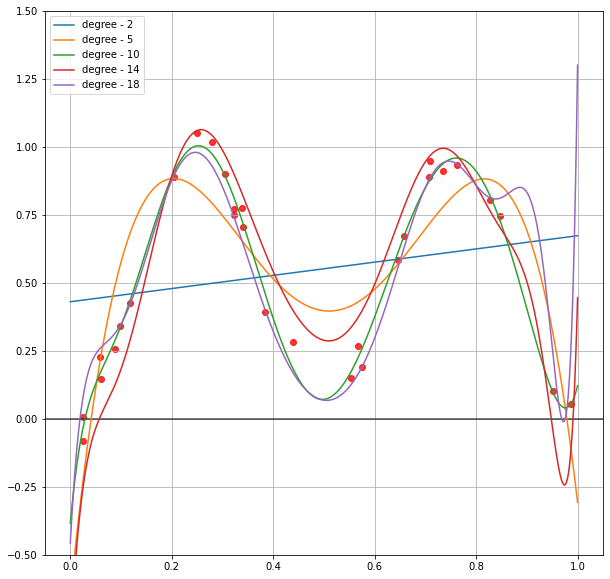

In [592]:
plt.figure(figsize=[10,10])
plt.axhline(0,color="k",alpha=0.7)
plt.scatter(sample_x,y,color="r",alpha=0.8)
plt.plot(x_axis,get_pol(x_axis,lin_reg_2),label="degree - 2")
plt.plot(x_axis,get_pol(x_axis,lin_reg_5),label="degree - 5")
plt.plot(x_axis,get_pol(x_axis,lin_reg_10),label="degree - 10")
plt.plot(x_axis,get_pol(x_axis,lin_reg_14),label="degree - 14")
plt.plot(x_axis,get_pol(x_axis,lin_reg_18),label="degree - 18")
plt.grid()
plt.ylim(-0.5,1.5)
plt.legend()
plt.show()

### 1.1.2. b) Plot the natural log of the training error versus the polynomial dimension

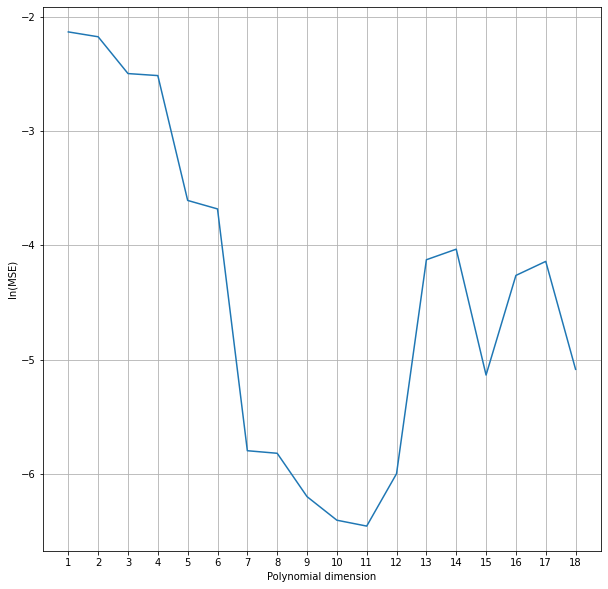

In [594]:
lin_reg_1 = LinearRegressionMSE()
lin_reg_1.fit(change_basis_vector(x,1),y)
pred_1 = lin_reg_1.predict(change_basis_vector(x,1))
mse_1 = lin_reg_1.mse(pred_1,y)

lin_reg_3 = LinearRegressionMSE()
lin_reg_3.fit(change_basis_vector(x,3),y)
pred_3 = lin_reg_3.predict(change_basis_vector(x,3))
mse_3 = lin_reg_3.mse(pred_3,y)

lin_reg_4 = LinearRegressionMSE()
lin_reg_4.fit(change_basis_vector(x,4),y)
pred_4 = lin_reg_4.predict(change_basis_vector(x,4))
mse_4 = lin_reg_4.mse(pred_4,y)

lin_reg_6 = LinearRegressionMSE()
lin_reg_6.fit(change_basis_vector(x,6),y)
pred_6 = lin_reg_6.predict(change_basis_vector(x,6))
mse_6 = lin_reg_6.mse(pred_6,y)

lin_reg_7 = LinearRegressionMSE()
lin_reg_7.fit(change_basis_vector(x,7),y)
pred_7 = lin_reg_7.predict(change_basis_vector(x,7))
mse_7 = lin_reg_7.mse(pred_7,y)

lin_reg_8 = LinearRegressionMSE()
lin_reg_8.fit(change_basis_vector(x,8),y)
pred_8 = lin_reg_8.predict(change_basis_vector(x,8))
mse_8 = lin_reg_8.mse(pred_8,y)

lin_reg_9 = LinearRegressionMSE()
lin_reg_9.fit(change_basis_vector(x,9),y)
pred_9 = lin_reg_9.predict(change_basis_vector(x,9))
mse_9 = lin_reg_9.mse(pred_9,y)

lin_reg_11 = LinearRegressionMSE()
lin_reg_11.fit(change_basis_vector(x,11),y)
pred_11 = lin_reg_11.predict(change_basis_vector(x,11))
mse_11 = lin_reg_11.mse(pred_11,y)

lin_reg_12 = LinearRegressionMSE()
lin_reg_12.fit(change_basis_vector(x,12),y)
pred_12 = lin_reg_12.predict(change_basis_vector(x,12))
mse_12 = lin_reg_12.mse(pred_12,y)

lin_reg_13 = LinearRegressionMSE()
lin_reg_13.fit(change_basis_vector(x,13),y)
pred_13 = lin_reg_13.predict(change_basis_vector(x,13))
mse_13 = lin_reg_13.mse(pred_13,y)

lin_reg_15 = LinearRegressionMSE()
lin_reg_15.fit(change_basis_vector(x,15),y)
pred_15 = lin_reg_15.predict(change_basis_vector(x,15))
mse_15 = lin_reg_15.mse(pred_15,y)

lin_reg_16 = LinearRegressionMSE()
lin_reg_16.fit(change_basis_vector(x,16),y)
pred_16 = lin_reg_16.predict(change_basis_vector(x,16))
mse_16 = lin_reg_16.mse(pred_16,y)

lin_reg_17 = LinearRegressionMSE()
lin_reg_17.fit(change_basis_vector(x,17),y)
pred_17 = lin_reg_17.predict(change_basis_vector(x,17))
mse_17 = lin_reg_17.mse(pred_17,y)

train_mses = [mse_1,mse_2,mse_3,mse_4,mse_5,mse_6,mse_7,mse_8,mse_9,mse_10,mse_11,mse_12,mse_13,mse_14,mse_15,mse_16,mse_17,mse_18] #list that stores the MSEs for each model
ln_mses = [np.log(mse) for mse in train_mses] #generated list with the natural logarithm applied to each MSE
degrees = np.arange(1,19,1)
plt.figure(figsize=[10,10])
plt.plot(degrees,ln_mses)
plt.ylabel("ln(MSE)")
plt.xlabel("Polynomial dimension")
plt.xticks(np.arange(1,19,1))
plt.grid()
plt.show()

### 1.1.2. c) Test set 

In [596]:
test_x = np.random.random(1000)
test_y = func_x_vectorised(test_x)+np.random.normal(0,0.07,1000)

test_x = test_x.reshape(-1,1)
test_y = test_y.reshape(-1,1)

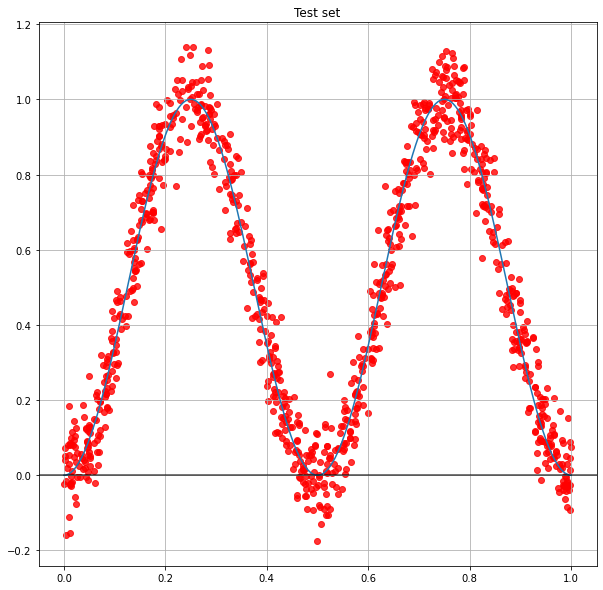

In [597]:
x_axis = np.linspace(0,1,500)
plt.figure(figsize=[10,10])
plt.plot(x_axis,np.sin(2*np.pi*x_axis)**2)
plt.axhline(0,color="k",alpha=0.7)
plt.scatter(test_x,test_y,color="r",alpha=0.8)
plt.title("Test set")
plt.grid()
plt.show()

In [598]:
test_mse_1 = lin_reg_1.mse(lin_reg_1.predict(change_basis_vector(test_x,1)),test_y)
test_mse_2 = lin_reg_2.mse(lin_reg_2.predict(change_basis_vector(test_x,2)),test_y)
test_mse_3 = lin_reg_3.mse(lin_reg_3.predict(change_basis_vector(test_x,3)),test_y)
test_mse_4 = lin_reg_4.mse(lin_reg_4.predict(change_basis_vector(test_x,4)),test_y)
test_mse_5 = lin_reg_5.mse(lin_reg_5.predict(change_basis_vector(test_x,5)),test_y)
test_mse_6 = lin_reg_6.mse(lin_reg_6.predict(change_basis_vector(test_x,6)),test_y)
test_mse_7 = lin_reg_7.mse(lin_reg_7.predict(change_basis_vector(test_x,7)),test_y)
test_mse_8 = lin_reg_8.mse(lin_reg_8.predict(change_basis_vector(test_x,8)),test_y)
test_mse_9 = lin_reg_9.mse(lin_reg_9.predict(change_basis_vector(test_x,9)),test_y)
test_mse_10 = lin_reg_10.mse(lin_reg_10.predict(change_basis_vector(test_x,10)),test_y)
test_mse_11 = lin_reg_11.mse(lin_reg_11.predict(change_basis_vector(test_x,11)),test_y)
test_mse_12 = lin_reg_12.mse(lin_reg_12.predict(change_basis_vector(test_x,12)),test_y)
test_mse_13 = lin_reg_13.mse(lin_reg_13.predict(change_basis_vector(test_x,13)),test_y)
test_mse_14 = lin_reg_14.mse(lin_reg_14.predict(change_basis_vector(test_x,14)),test_y)
test_mse_15 = lin_reg_15.mse(lin_reg_15.predict(change_basis_vector(test_x,15)),test_y)
test_mse_16 = lin_reg_16.mse(lin_reg_16.predict(change_basis_vector(test_x,16)),test_y)
test_mse_17 = lin_reg_17.mse(lin_reg_17.predict(change_basis_vector(test_x,17)),test_y)
test_mse_18 = lin_reg_18.mse(lin_reg_18.predict(change_basis_vector(test_x,18)),test_y)

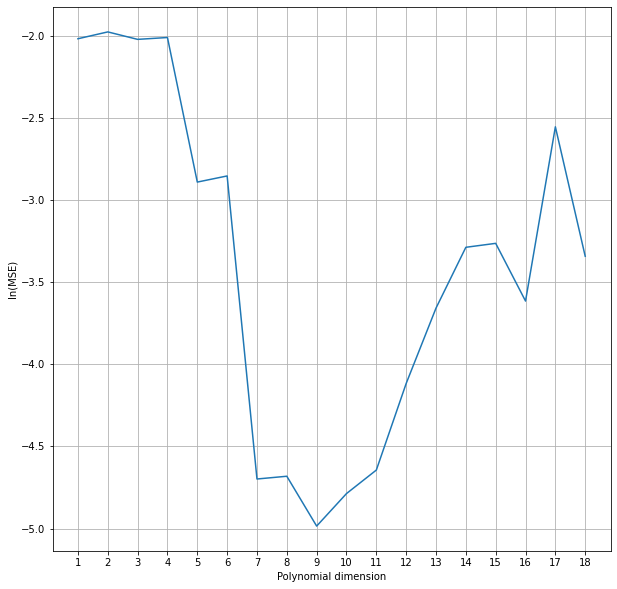

In [645]:
test_mses = [test_mse_1,test_mse_2,test_mse_3,test_mse_4,test_mse_5,test_mse_6,test_mse_7,test_mse_8,test_mse_9,test_mse_10,test_mse_11,test_mse_12,test_mse_13,test_mse_14,test_mse_15,test_mse_16,test_mse_17,test_mse_18]
ln_mses_test = [np.log(mse) for mse in test_mses]
degrees = np.arange(1,19,1)
plt.figure(figsize=[10,10])
plt.plot(degrees,ln_mses_test,label="Test MSE")
plt.ylabel("ln(MSE)")
plt.xlabel("Polynomial dimension")
plt.xticks(np.arange(1,19,1))
plt.grid()
plt.show()

### 1.1.2. d) Repeat for 100 iterations and plot the average ln(MSE) for training and testing

In [21]:
def train_and_test(iters):
    #avgs_train and avgs_test are initialised as vectors of zeros with 18 entries corresponding to each of the 18 models, they will store the total MSE over 100 iterations for each model
    avgs_train = np.zeros(18) 
    avgs_test = np.zeros(18)
    for iter in range(iters): #iters is the parameter that is passed to the function to control the number of training and testing iterations

        sample_x = np.random.random(30)
        def func_x(x):
            return np.sin(2*np.pi*x)**2
        func_x_vectorised = np.vectorize(func_x)
        y = func_x_vectorised(sample_x)+np.random.normal(0,0.07,30)

        x = sample_x.reshape(-1,1)
        y = y.reshape(-1,1)

        lin_reg_1 = LinearRegressionMSE()
        lin_reg_1.fit(change_basis_vector(x,1),y)
        pred_1 = lin_reg_1.predict(change_basis_vector(x,1))
        mse_1 = lin_reg_1.mse(pred_1,y)

        lin_reg_2 = LinearRegressionMSE()
        lin_reg_2.fit(change_basis_vector(x,2),y)
        pred_2 = lin_reg_2.predict(change_basis_vector(x,2))
        mse_2 = lin_reg_2.mse(pred_2,y)

        lin_reg_3 = LinearRegressionMSE()
        lin_reg_3.fit(change_basis_vector(x,3),y)
        pred_3 = lin_reg_3.predict(change_basis_vector(x,3))
        mse_3 = lin_reg_3.mse(pred_3,y)

        lin_reg_4 = LinearRegressionMSE()
        lin_reg_4.fit(change_basis_vector(x,4),y)
        pred_4 = lin_reg_4.predict(change_basis_vector(x,4))
        mse_4 = lin_reg_4.mse(pred_4,y)

        lin_reg_5 = LinearRegressionMSE()
        lin_reg_5.fit(change_basis_vector(x,5),y)
        pred_5 = lin_reg_5.predict(change_basis_vector(x,5))
        mse_5 = lin_reg_5.mse(pred_5,y)

        lin_reg_6 = LinearRegressionMSE()
        lin_reg_6.fit(change_basis_vector(x,6),y)
        pred_6 = lin_reg_6.predict(change_basis_vector(x,6))
        mse_6 = lin_reg_6.mse(pred_6,y)

        lin_reg_7 = LinearRegressionMSE()
        lin_reg_7.fit(change_basis_vector(x,7),y)
        pred_7 = lin_reg_7.predict(change_basis_vector(x,7))
        mse_7 = lin_reg_7.mse(pred_7,y)

        lin_reg_8 = LinearRegressionMSE()
        lin_reg_8.fit(change_basis_vector(x,8),y)
        pred_8 = lin_reg_8.predict(change_basis_vector(x,8))
        mse_8 = lin_reg_8.mse(pred_8,y)

        lin_reg_9 = LinearRegressionMSE()
        lin_reg_9.fit(change_basis_vector(x,9),y)
        pred_9 = lin_reg_9.predict(change_basis_vector(x,9))
        mse_9 = lin_reg_9.mse(pred_9,y)

        lin_reg_10 = LinearRegressionMSE()
        lin_reg_10.fit(change_basis_vector(x,10),y)
        pred_10 = lin_reg_10.predict(change_basis_vector(x,10))
        mse_10 = lin_reg_10.mse(pred_10,y)

        lin_reg_11 = LinearRegressionMSE()
        lin_reg_11.fit(change_basis_vector(x,11),y)
        pred_11 = lin_reg_11.predict(change_basis_vector(x,11))
        mse_11 = lin_reg_11.mse(pred_11,y)

        lin_reg_12 = LinearRegressionMSE()
        lin_reg_12.fit(change_basis_vector(x,12),y)
        pred_12 = lin_reg_12.predict(change_basis_vector(x,12))
        mse_12 = lin_reg_12.mse(pred_12,y)

        lin_reg_13 = LinearRegressionMSE()
        lin_reg_13.fit(change_basis_vector(x,13),y)
        pred_13 = lin_reg_13.predict(change_basis_vector(x,13))
        mse_13 = lin_reg_13.mse(pred_13,y)

        lin_reg_14 = LinearRegressionMSE()
        lin_reg_14.fit(change_basis_vector(x,14),y)
        pred_14 = lin_reg_14.predict(change_basis_vector(x,14))
        mse_14 = lin_reg_14.mse(pred_14,y)

        lin_reg_15 = LinearRegressionMSE()
        lin_reg_15.fit(change_basis_vector(x,15),y)
        pred_15 = lin_reg_15.predict(change_basis_vector(x,15))
        mse_15 = lin_reg_15.mse(pred_15,y)

        lin_reg_16 = LinearRegressionMSE()
        lin_reg_16.fit(change_basis_vector(x,16),y)
        pred_16 = lin_reg_16.predict(change_basis_vector(x,16))
        mse_16 = lin_reg_16.mse(pred_16,y)

        lin_reg_17 = LinearRegressionMSE()
        lin_reg_17.fit(change_basis_vector(x,17),y)
        pred_17 = lin_reg_17.predict(change_basis_vector(x,17))
        mse_17 = lin_reg_17.mse(pred_17,y)

        lin_reg_18 = LinearRegressionMSE()
        lin_reg_18.fit(change_basis_vector(x,18),y)
        pred_18 = lin_reg_18.predict(change_basis_vector(x,18))
        mse_18 = lin_reg_18.mse(pred_18,y)

        test_x = np.random.random(1000)
        test_y = func_x_vectorised(test_x)+np.random.normal(0,0.07,1000)

        test_x = test_x.reshape(-1,1)
        test_y = test_y.reshape(-1,1)
        
        test_mse_1 = lin_reg_1.mse(lin_reg_1.predict(change_basis_vector(test_x,1)),test_y)
        test_mse_2 = lin_reg_2.mse(lin_reg_2.predict(change_basis_vector(test_x,2)),test_y)
        test_mse_3 = lin_reg_3.mse(lin_reg_3.predict(change_basis_vector(test_x,3)),test_y)
        test_mse_4 = lin_reg_4.mse(lin_reg_4.predict(change_basis_vector(test_x,4)),test_y)
        test_mse_5 = lin_reg_5.mse(lin_reg_5.predict(change_basis_vector(test_x,5)),test_y)
        test_mse_6 = lin_reg_6.mse(lin_reg_6.predict(change_basis_vector(test_x,6)),test_y)
        test_mse_7 = lin_reg_7.mse(lin_reg_7.predict(change_basis_vector(test_x,7)),test_y)
        test_mse_8 = lin_reg_8.mse(lin_reg_8.predict(change_basis_vector(test_x,8)),test_y)
        test_mse_9 = lin_reg_9.mse(lin_reg_9.predict(change_basis_vector(test_x,9)),test_y)
        test_mse_10 = lin_reg_10.mse(lin_reg_10.predict(change_basis_vector(test_x,10)),test_y)
        test_mse_11 = lin_reg_11.mse(lin_reg_11.predict(change_basis_vector(test_x,11)),test_y)
        test_mse_12 = lin_reg_12.mse(lin_reg_12.predict(change_basis_vector(test_x,12)),test_y)
        test_mse_13 = lin_reg_13.mse(lin_reg_13.predict(change_basis_vector(test_x,13)),test_y)
        test_mse_14 = lin_reg_14.mse(lin_reg_14.predict(change_basis_vector(test_x,14)),test_y)
        test_mse_15 = lin_reg_15.mse(lin_reg_15.predict(change_basis_vector(test_x,15)),test_y)
        test_mse_16 = lin_reg_16.mse(lin_reg_16.predict(change_basis_vector(test_x,16)),test_y)
        test_mse_17 = lin_reg_17.mse(lin_reg_17.predict(change_basis_vector(test_x,17)),test_y)
        test_mse_18 = lin_reg_18.mse(lin_reg_18.predict(change_basis_vector(test_x,18)),test_y)

        train_mses = np.asarray([mse_1,mse_2,mse_3,mse_4,mse_5,mse_6,mse_7,mse_8,mse_9,mse_10,mse_11,mse_12,mse_13,mse_14,mse_15,mse_16,mse_17,mse_18])
        test_mses = np.asarray([test_mse_1,test_mse_2,test_mse_3,test_mse_4,test_mse_5,test_mse_6,test_mse_7,test_mse_8,test_mse_9,test_mse_10,test_mse_11,test_mse_12,test_mse_13,test_mse_14,test_mse_15,test_mse_16,        test_mse_17,test_mse_18])

        #after each iteration
        avgs_train += train_mses 
        avgs_test += test_mses

    return avgs_train/iters,avgs_test/iters

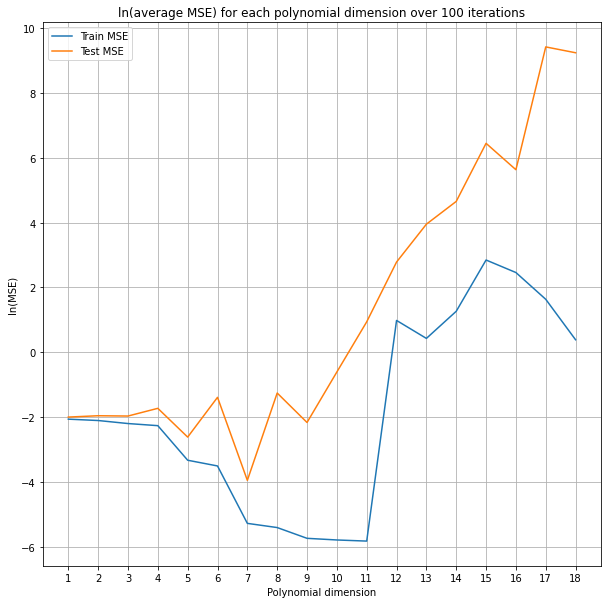

In [22]:
avgs_train,avgs_test = train_and_test(100)

avgs_ln_train = [np.log(mse) for mse in avgs_train]
avgs_ln_test = [np.log(mse) for mse in avgs_test]

degrees = np.arange(1,19,1)
plt.figure(figsize=[10,10])
plt.plot(degrees,avgs_ln_train,label="Train MSE")
plt.plot(degrees,avgs_ln_test,label="Test MSE")
plt.ylabel("ln(MSE)")
plt.xlabel("Polynomial dimension")
plt.xticks(np.arange(1,19,1))
plt.title("ln(average MSE) for each polynomial dimension over 100 iterations")
plt.grid()

plt.legend()
plt.show()

### 1.1.3. Sine basis

In [6]:
sample_x = np.random.random(30)
def func_x(x):
    return np.sin(2*np.pi*x)**2
func_x_vectorised = np.vectorize(func_x)
y = func_x_vectorised(sample_x)+np.random.normal(0,0.07,30)

In [7]:
x = sample_x.reshape(-1,1)
y = y.reshape(-1,1)

In [8]:
def change_basis_vector_sine(vector,degree): #function returns the transformed input vector based on the degree (1,...,18) passed to the function  
    if degree == 1:
        return np.sin(np.pi*vector)
    output = np.sin(np.pi*vector)
    for i in range(2,degree+1):
        output = np.append(output,np.sin(i*np.pi*vector),axis=1)
    return output

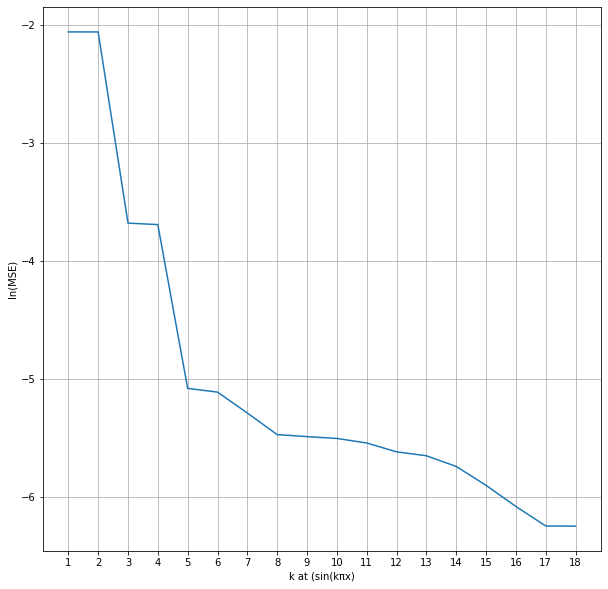

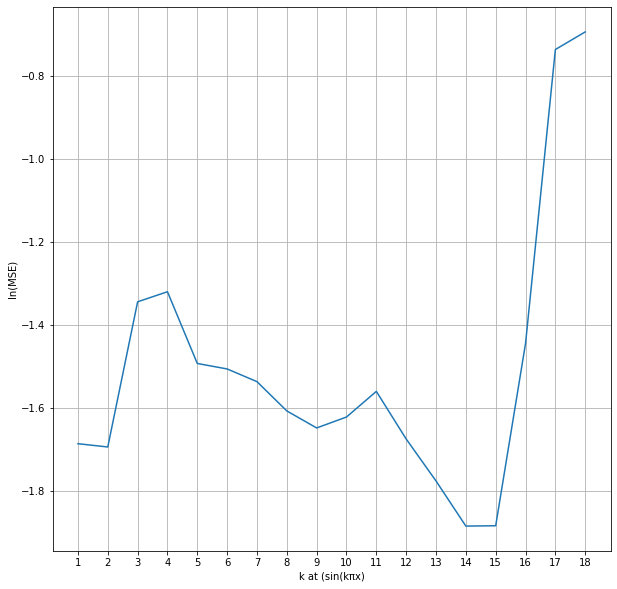

In [15]:
lin_reg_1 = LinearRegressionMSE()
lin_reg_1.fit(change_basis_vector_sine(x,1),y)
pred_1 = lin_reg_1.predict(change_basis_vector_sine(x,1))
mse_1 = lin_reg_1.mse(pred_1,y)

lin_reg_2 = LinearRegressionMSE()
lin_reg_2.fit(change_basis_vector_sine(x,2),y)
pred_2 = lin_reg_2.predict(change_basis_vector_sine(x,2))
mse_2 = lin_reg_2.mse(pred_2,y)

lin_reg_3 = LinearRegressionMSE()
lin_reg_3.fit(change_basis_vector_sine(x,3),y)
pred_3 = lin_reg_3.predict(change_basis_vector_sine(x,3))
mse_3 = lin_reg_3.mse(pred_3,y)

lin_reg_4 = LinearRegressionMSE()
lin_reg_4.fit(change_basis_vector_sine(x,4),y)
pred_4 = lin_reg_4.predict(change_basis_vector_sine(x,4))
mse_4 = lin_reg_4.mse(pred_4,y)

lin_reg_5 = LinearRegressionMSE()
lin_reg_5.fit(change_basis_vector_sine(x,5),y)
pred_5 = lin_reg_5.predict(change_basis_vector_sine(x,5))
mse_5 = lin_reg_5.mse(pred_5,y)

lin_reg_6 = LinearRegressionMSE()
lin_reg_6.fit(change_basis_vector_sine(x,6),y)
pred_6 = lin_reg_6.predict(change_basis_vector_sine(x,6))
mse_6 = lin_reg_6.mse(pred_6,y)

lin_reg_7 = LinearRegressionMSE()
lin_reg_7.fit(change_basis_vector_sine(x,7),y)
pred_7 = lin_reg_7.predict(change_basis_vector_sine(x,7))
mse_7 = lin_reg_7.mse(pred_7,y)

lin_reg_8 = LinearRegressionMSE()
lin_reg_8.fit(change_basis_vector_sine(x,8),y)
pred_8 = lin_reg_8.predict(change_basis_vector_sine(x,8))
mse_8 = lin_reg_8.mse(pred_8,y)

lin_reg_9 = LinearRegressionMSE()
lin_reg_9.fit(change_basis_vector_sine(x,9),y)
pred_9 = lin_reg_9.predict(change_basis_vector_sine(x,9))
mse_9 = lin_reg_9.mse(pred_9,y)

lin_reg_10 = LinearRegressionMSE()
lin_reg_10.fit(change_basis_vector_sine(x,10),y)
pred_10 = lin_reg_10.predict(change_basis_vector_sine(x,10))
mse_10 = lin_reg_10.mse(pred_10,y)

lin_reg_11 = LinearRegressionMSE()
lin_reg_11.fit(change_basis_vector_sine(x,11),y)
pred_11 = lin_reg_11.predict(change_basis_vector_sine(x,11))
mse_11 = lin_reg_11.mse(pred_11,y)

lin_reg_12 = LinearRegressionMSE()
lin_reg_12.fit(change_basis_vector_sine(x,12),y)
pred_12 = lin_reg_12.predict(change_basis_vector_sine(x,12))
mse_12 = lin_reg_12.mse(pred_12,y)

lin_reg_13 = LinearRegressionMSE()
lin_reg_13.fit(change_basis_vector_sine(x,13),y)
pred_13 = lin_reg_13.predict(change_basis_vector_sine(x,13))
mse_13 = lin_reg_13.mse(pred_13,y)

lin_reg_14 = LinearRegressionMSE()
lin_reg_14.fit(change_basis_vector_sine(x,14),y)
pred_14 = lin_reg_14.predict(change_basis_vector_sine(x,14))
mse_14 = lin_reg_14.mse(pred_14,y)

lin_reg_15 = LinearRegressionMSE()
lin_reg_15.fit(change_basis_vector_sine(x,15),y)
pred_15 = lin_reg_15.predict(change_basis_vector_sine(x,15))
mse_15 = lin_reg_15.mse(pred_15,y)

lin_reg_16 = LinearRegressionMSE()
lin_reg_16.fit(change_basis_vector_sine(x,16),y)
pred_16 = lin_reg_16.predict(change_basis_vector_sine(x,16))
mse_16 = lin_reg_16.mse(pred_16,y)

lin_reg_17 = LinearRegressionMSE()
lin_reg_17.fit(change_basis_vector_sine(x,17),y)
pred_17 = lin_reg_17.predict(change_basis_vector_sine(x,17))
mse_17 = lin_reg_17.mse(pred_17,y)

lin_reg_18 = LinearRegressionMSE()
lin_reg_18.fit(change_basis_vector_sine(x,18),y)
pred_18 = lin_reg_18.predict(change_basis_vector_sine(x,18))
mse_18 = lin_reg_18.mse(pred_18,y)

test_x = np.random.random(1000)
test_y = func_x_vectorised(test_x)+np.random.normal(0,0.07,1000)

test_x = test_x.reshape(-1,1)
test_y = test_y.reshape(-1,1)

test_mse_1 = lin_reg_1.mse(lin_reg_1.predict(change_basis_vector(test_x,1)),test_y)
test_mse_2 = lin_reg_2.mse(lin_reg_2.predict(change_basis_vector(test_x,2)),test_y)
test_mse_3 = lin_reg_3.mse(lin_reg_3.predict(change_basis_vector(test_x,3)),test_y)
test_mse_4 = lin_reg_4.mse(lin_reg_4.predict(change_basis_vector(test_x,4)),test_y)
test_mse_5 = lin_reg_5.mse(lin_reg_5.predict(change_basis_vector(test_x,5)),test_y)
test_mse_6 = lin_reg_6.mse(lin_reg_6.predict(change_basis_vector(test_x,6)),test_y)
test_mse_7 = lin_reg_7.mse(lin_reg_7.predict(change_basis_vector(test_x,7)),test_y)
test_mse_8 = lin_reg_8.mse(lin_reg_8.predict(change_basis_vector(test_x,8)),test_y)
test_mse_9 = lin_reg_9.mse(lin_reg_9.predict(change_basis_vector(test_x,9)),test_y)
test_mse_10 = lin_reg_10.mse(lin_reg_10.predict(change_basis_vector(test_x,10)),test_y)
test_mse_11 = lin_reg_11.mse(lin_reg_11.predict(change_basis_vector(test_x,11)),test_y)
test_mse_12 = lin_reg_12.mse(lin_reg_12.predict(change_basis_vector(test_x,12)),test_y)
test_mse_13 = lin_reg_13.mse(lin_reg_13.predict(change_basis_vector(test_x,13)),test_y)
test_mse_14 = lin_reg_14.mse(lin_reg_14.predict(change_basis_vector(test_x,14)),test_y)
test_mse_15 = lin_reg_15.mse(lin_reg_15.predict(change_basis_vector(test_x,15)),test_y)
test_mse_16 = lin_reg_16.mse(lin_reg_16.predict(change_basis_vector(test_x,16)),test_y)
test_mse_17 = lin_reg_17.mse(lin_reg_17.predict(change_basis_vector(test_x,17)),test_y)
test_mse_18 = lin_reg_18.mse(lin_reg_18.predict(change_basis_vector(test_x,18)),test_y)

train_mses = [mse_1,mse_2,mse_3,mse_4,mse_5,mse_6,mse_7,mse_8,mse_9,mse_10,mse_11,mse_12,mse_13,mse_14,mse_15,mse_16,mse_17,mse_18]
ln_mses =  np.asarray([np.log(mse) for mse in train_mses])
test_mses = [test_mse_1,test_mse_2,test_mse_3,test_mse_4,test_mse_5,test_mse_6,test_mse_7,test_mse_8,test_mse_9,test_mse_10,test_mse_11,test_mse_12,test_mse_13,test_mse_14,test_mse_15,test_mse_16,test_mse_17,test_mse_18]
ln_mses_test = [np.log(mse) for mse in test_mses]

degrees = np.arange(1,19,1)
plt.figure(figsize=[10,10])
plt.plot(degrees,ln_mses)
plt.ylabel("ln(MSE)")
plt.xlabel("k at (sin(k\u03C0x)")
plt.xticks(np.arange(1,19,1))
plt.grid()
plt.show()

degrees = np.arange(1,19,1)
plt.figure(figsize=[10,10])
plt.plot(degrees,ln_mses_test)
plt.ylabel("ln(MSE)")
plt.xlabel("k at (sin(k\u03C0x)")
plt.xticks(np.arange(1,19,1))
plt.grid()
plt.show()

In [16]:
def train_and_test_sine(iters):
    avgs_train = np.zeros(18)
    avgs_test = np.zeros(18)
    
    for iter in range(iters):

        sample_x = np.random.random(30)
        def func_x(x):
            return np.sin(2*np.pi*x)**2
        func_x_vectorised = np.vectorize(func_x)
        y = func_x_vectorised(sample_x)+np.random.normal(0,0.07,30)

        x = sample_x.reshape(-1,1)
        y = y.reshape(-1,1)

        lin_reg_1 = LinearRegressionMSE()
        lin_reg_1.fit(change_basis_vector_sine(x,1),y)
        pred_1 = lin_reg_1.predict(change_basis_vector_sine(x,1))
        mse_1 = lin_reg_1.mse(pred_1,y)

        lin_reg_2 = LinearRegressionMSE()
        lin_reg_2.fit(change_basis_vector_sine(x,2),y)
        pred_2 = lin_reg_2.predict(change_basis_vector_sine(x,2))
        mse_2 = lin_reg_2.mse(pred_2,y)

        lin_reg_3 = LinearRegressionMSE()
        lin_reg_3.fit(change_basis_vector_sine(x,3),y)
        pred_3 = lin_reg_3.predict(change_basis_vector_sine(x,3))
        mse_3 = lin_reg_3.mse(pred_3,y)

        lin_reg_4 = LinearRegressionMSE()
        lin_reg_4.fit(change_basis_vector_sine(x,4),y)
        pred_4 = lin_reg_4.predict(change_basis_vector_sine(x,4))
        mse_4 = lin_reg_4.mse(pred_4,y)

        lin_reg_5 = LinearRegressionMSE()
        lin_reg_5.fit(change_basis_vector_sine(x,5),y)
        pred_5 = lin_reg_5.predict(change_basis_vector_sine(x,5))
        mse_5 = lin_reg_5.mse(pred_5,y)

        lin_reg_6 = LinearRegressionMSE()
        lin_reg_6.fit(change_basis_vector_sine(x,6),y)
        pred_6 = lin_reg_6.predict(change_basis_vector_sine(x,6))
        mse_6 = lin_reg_6.mse(pred_6,y)

        lin_reg_7 = LinearRegressionMSE()
        lin_reg_7.fit(change_basis_vector_sine(x,7),y)
        pred_7 = lin_reg_7.predict(change_basis_vector_sine(x,7))
        mse_7 = lin_reg_7.mse(pred_7,y)

        lin_reg_8 = LinearRegressionMSE()
        lin_reg_8.fit(change_basis_vector_sine(x,8),y)
        pred_8 = lin_reg_8.predict(change_basis_vector_sine(x,8))
        mse_8 = lin_reg_8.mse(pred_8,y)

        lin_reg_9 = LinearRegressionMSE()
        lin_reg_9.fit(change_basis_vector_sine(x,9),y)
        pred_9 = lin_reg_9.predict(change_basis_vector_sine(x,9))
        mse_9 = lin_reg_9.mse(pred_9,y)

        lin_reg_10 = LinearRegressionMSE()
        lin_reg_10.fit(change_basis_vector_sine(x,10),y)
        pred_10 = lin_reg_10.predict(change_basis_vector_sine(x,10))
        mse_10 = lin_reg_10.mse(pred_10,y)

        lin_reg_11 = LinearRegressionMSE()
        lin_reg_11.fit(change_basis_vector_sine(x,11),y)
        pred_11 = lin_reg_11.predict(change_basis_vector_sine(x,11))
        mse_11 = lin_reg_11.mse(pred_11,y)

        lin_reg_12 = LinearRegressionMSE()
        lin_reg_12.fit(change_basis_vector_sine(x,12),y)
        pred_12 = lin_reg_12.predict(change_basis_vector_sine(x,12))
        mse_12 = lin_reg_12.mse(pred_12,y)

        lin_reg_13 = LinearRegressionMSE()
        lin_reg_13.fit(change_basis_vector_sine(x,13),y)
        pred_13 = lin_reg_13.predict(change_basis_vector_sine(x,13))
        mse_13 = lin_reg_13.mse(pred_13,y)

        lin_reg_14 = LinearRegressionMSE()
        lin_reg_14.fit(change_basis_vector_sine(x,14),y)
        pred_14 = lin_reg_14.predict(change_basis_vector_sine(x,14))
        mse_14 = lin_reg_14.mse(pred_14,y)

        lin_reg_15 = LinearRegressionMSE()
        lin_reg_15.fit(change_basis_vector_sine(x,15),y)
        pred_15 = lin_reg_15.predict(change_basis_vector_sine(x,15))
        mse_15 = lin_reg_15.mse(pred_15,y)

        lin_reg_16 = LinearRegressionMSE()
        lin_reg_16.fit(change_basis_vector_sine(x,16),y)
        pred_16 = lin_reg_16.predict(change_basis_vector_sine(x,16))
        mse_16 = lin_reg_16.mse(pred_16,y)

        lin_reg_17 = LinearRegressionMSE()
        lin_reg_17.fit(change_basis_vector_sine(x,17),y)
        pred_17 = lin_reg_17.predict(change_basis_vector_sine(x,17))
        mse_17 = lin_reg_17.mse(pred_17,y)

        lin_reg_18 = LinearRegressionMSE()
        lin_reg_18.fit(change_basis_vector_sine(x,18),y)
        pred_18 = lin_reg_18.predict(change_basis_vector_sine(x,18))
        mse_18 = lin_reg_18.mse(pred_18,y)

        test_x = np.random.random(1000)
        test_y = func_x_vectorised(test_x)+np.random.normal(0,0.07,1000)

        test_x = test_x.reshape(-1,1)
        test_y = test_y.reshape(-1,1)

        test_mse_1 = lin_reg_1.mse(lin_reg_1.predict(change_basis_vector(test_x,1)),test_y)
        test_mse_2 = lin_reg_2.mse(lin_reg_2.predict(change_basis_vector(test_x,2)),test_y)
        test_mse_3 = lin_reg_3.mse(lin_reg_3.predict(change_basis_vector(test_x,3)),test_y)
        test_mse_4 = lin_reg_4.mse(lin_reg_4.predict(change_basis_vector(test_x,4)),test_y)
        test_mse_5 = lin_reg_5.mse(lin_reg_5.predict(change_basis_vector(test_x,5)),test_y)
        test_mse_6 = lin_reg_6.mse(lin_reg_6.predict(change_basis_vector(test_x,6)),test_y)
        test_mse_7 = lin_reg_7.mse(lin_reg_7.predict(change_basis_vector(test_x,7)),test_y)
        test_mse_8 = lin_reg_8.mse(lin_reg_8.predict(change_basis_vector(test_x,8)),test_y)
        test_mse_9 = lin_reg_9.mse(lin_reg_9.predict(change_basis_vector(test_x,9)),test_y)
        test_mse_10 = lin_reg_10.mse(lin_reg_10.predict(change_basis_vector(test_x,10)),test_y)
        test_mse_11 = lin_reg_11.mse(lin_reg_11.predict(change_basis_vector(test_x,11)),test_y)
        test_mse_12 = lin_reg_12.mse(lin_reg_12.predict(change_basis_vector(test_x,12)),test_y)
        test_mse_13 = lin_reg_13.mse(lin_reg_13.predict(change_basis_vector(test_x,13)),test_y)
        test_mse_14 = lin_reg_14.mse(lin_reg_14.predict(change_basis_vector(test_x,14)),test_y)
        test_mse_15 = lin_reg_15.mse(lin_reg_15.predict(change_basis_vector(test_x,15)),test_y)
        test_mse_16 = lin_reg_16.mse(lin_reg_16.predict(change_basis_vector(test_x,16)),test_y)
        test_mse_17 = lin_reg_17.mse(lin_reg_17.predict(change_basis_vector(test_x,17)),test_y)
        test_mse_18 = lin_reg_18.mse(lin_reg_18.predict(change_basis_vector(test_x,18)),test_y)

        train_mses = np.asarray([mse_1,mse_2,mse_3,mse_4,mse_5,mse_6,mse_7,mse_8,mse_9,mse_10,mse_11,mse_12,mse_13,mse_14,mse_15,mse_16,mse_17,mse_18])
        test_mses = np.asarray([test_mse_1,test_mse_2,test_mse_3,test_mse_4,test_mse_5,test_mse_6,test_mse_7,test_mse_8,test_mse_9,test_mse_10,test_mse_11,test_mse_12,test_mse_13,test_mse_14,test_mse_15,test_mse_16,test_mse_17,test_mse_18])

        avgs_train += train_mses
        avgs_test += test_mses

    return avgs_train/iters,avgs_test/iters

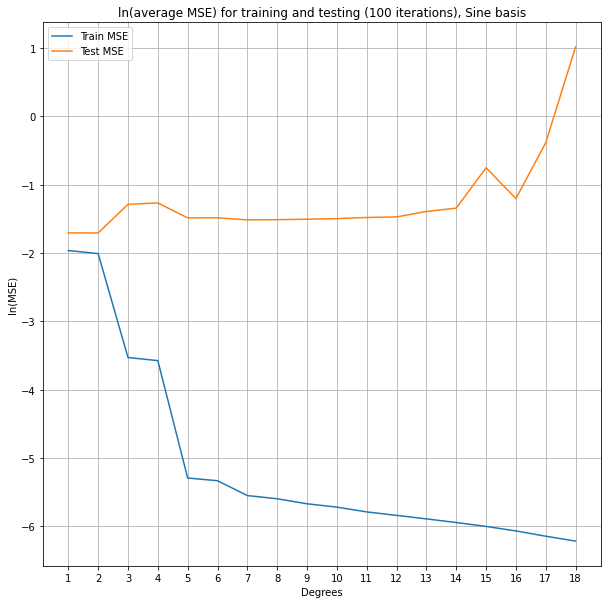

In [37]:
avgs_train, avgs_test = train_and_test_sine(100)

avgs_ln_train = [np.log(mse) for mse in avgs_train]
avgs_ln_test = [np.log(mse) for mse in avgs_test]

degrees = np.arange(1,19,1)
plt.figure(figsize=[10,10])
plt.plot(degrees,avgs_ln_train,label="Train MSE")
plt.plot(degrees,avgs_ln_test,label="Test MSE")
plt.ylabel("ln(MSE)")
plt.xlabel("Degrees")
plt.xticks(np.arange(1,19,1))
plt.title("ln(average MSE) for training and testing (100 iterations), Sine basis")
plt.grid()
plt.legend()
plt.show()

## 1.2. Filtered Boston Housing and Kernels (10 marks)

In [25]:
url = "http://www0.cs.ucl.ac.uk/staff/M.Herbster/boston-filter/Boston-filtered.csv"
dataset = pd.read_csv(url) #the dataset is downloaded from the provided link

In [61]:
def train_test_split(dataset): #function randomly shuffles and split the dataset into training and testing sets
    train_ind = np.random.choice(range(len(dataset)),337,replace=False) #337 random integers generated in the range from 0 to 505, where 337 represents the two-thirds of the dataset with 506 samples
    test_ind = np.asarray(list(set(range(len(dataset)))-set(train_ind))) #the remaining 169 integers are used to index the testing samples
    train = dataset.loc[train_ind]
    train_x = train.loc[:,dataset.columns!="MEDV"] #train_x does not include the training labels column ("MEDV")
    train_y = train[["MEDV"]]
    test = dataset.loc[test_ind]
    test_x = test.loc[:,dataset.columns!="MEDV"] 
    test_y = test[["MEDV"]]   
    return train_x,train_y,test_x,test_y

### 1.2. a) Naive Regression

In [62]:
def run_training_and_testing_part_a(dataset,iters): #the structure of the function follows previously used 
    train_mses = []
    test_mses = []
    for iter in range(iters):
        train_x,train_y,test_x,test_y = train_test_split(dataset)
        train_x = np.asarray(train_x)
        train_y = np.asarray(train_y)
        test_x = np.asarray(test_x)
        test_y = np.asarray(test_y)
        
        train_vec = np.ones(train_x.shape[0]).reshape(-1,1)
        test_vec = np.ones(test_x.shape[0]).reshape(-1,1)

        naive_reg = LinearRegressionMSE()
        naive_reg.fit(train_vec,train_y)
        train_mses.append(naive_reg.mse(naive_reg.predict(train_vec),train_y))
        test_mses.append(naive_reg.mse(naive_reg.predict(test_vec),test_y))

    coef = naive_reg.coef_[0]
    train_mean = train_y.mean()
    test_mean = test_y.mean()

    print(f"Naive regression predicts the mean of the median value of the owner-occupied homes training dataset: regression coefficient - {coef}, training mean median value - {train_mean}, testing mean median value - {test_mean} for the last iteration \n") #the print statement is used to demonstrate that the learned regression coefficient is equal to the training mean median value
    train_mses = np.asarray(train_mses)
    test_mses = np.asarray(test_mses)
    return train_mses.mean(),test_mses.mean(),train_mses.std(),test_mses.std()

In [63]:
train_mse,test_mse,train_std,test_std = run_training_and_testing_part_a(dataset,20)
print(f"Average MSE for 20 iterations: training - {train_mse}, testing - {test_mse}") #please note that the cell was run after generating the final table, so the cell outputs slightly differ from the reported values

Naive regression predicts the mean of the median value of the owner-occupied homes training dataset: regression coefficient - [22.37566766], training mean median value - 22.37566765578635, testing mean median value - 22.846153846153847 for the last iteration 

Average MSE for 20 iterations: training - 83.4647254620539, testing - 86.53473532139911


### c) Single attributes

In [64]:
def run_training_and_testing_part_c(dataset,iters):
    #to efficiently store the MSEs for each input feature, the dictionary data structure was used, which has a O(1) lookup time complexity in Python
    attribute_train_mse = {} #this dictionary stores the list of 20 MSEs calculated for each iteration 
    attribute_test_mse = {}

    #the following dictionaries are used to return the training/testing means and standard deviations for each attribute
    attribute_train_mean = {}
    attribute_test_mean = {}
    attribute_train_std = {}
    attribute_test_std = {}

    for iter in range(iters):
        train_x,train_y,test_x,test_y = train_test_split(dataset)
        train_x = np.asarray(train_x)
        train_y = np.asarray(train_y)
        test_x = np.asarray(test_x)
        test_y = np.asarray(test_y)

        for attr in range(train_x.shape[1]):
            lin_reg = LinearRegressionMSE()
            attr_vector = train_x[:,attr].reshape(-1,1)
            attr_vector_test = test_x[:,attr].reshape(-1,1)
            lin_reg.fit(change_basis_vector(attr_vector,2),train_y)

            if dataset.columns[attr] not in attribute_train_mse:
                attribute_train_mse[dataset.columns[attr]] = [lin_reg.mse(lin_reg.predict(change_basis_vector(attr_vector,2)),train_y)]
            else:
                attribute_train_mse[dataset.columns[attr]].append(lin_reg.mse(lin_reg.predict(change_basis_vector(attr_vector,2)),train_y))

            if dataset.columns[attr] not in attribute_test_mse:
                attribute_test_mse[dataset.columns[attr]] = [lin_reg.mse(lin_reg.predict(change_basis_vector(attr_vector_test,2)),test_y)]
            else:
                attribute_test_mse[dataset.columns[attr]].append(lin_reg.mse(lin_reg.predict(change_basis_vector(attr_vector_test,2)),test_y))
              
    for attr in attribute_train_mse:
        attribute_train_mean[attr] = np.asarray(attribute_train_mse[attr]).mean() 
        attribute_test_mean[attr] = np.asarray(attribute_test_mse[attr]).mean() 
        attribute_train_std[attr] = np.asarray(attribute_train_mse[attr]).std() 
        attribute_test_std[attr] = np.asarray(attribute_test_mse[attr]).std() 

    return attribute_train_mean,attribute_test_mean,attribute_train_std,attribute_test_std

In [65]:
attribute_train_mean,attribute_test_mean,attribute_train_std,attribute_test_std = run_training_and_testing_part_c(dataset,20)
attribute_train_mean,attribute_test_mean,attribute_train_std,attribute_test_std #please note that the cell was run after generating the final table, so the cell outputs slightly differ from the reported values

({'CRIM': 72.31567891035476,
  ' ZN ': 74.42554532591946,
  'INDUS ': 65.68634734986473,
  'CHAS': 81.93985748237485,
  'NOX': 69.83098349188592,
  'RM': 43.370621027778704,
  'AGE': 73.35069989429194,
  'DIS': 80.00792109434171,
  'RAD': 73.11250040541391,
  'TAX': 66.99801005415542,
  'PTRATIO': 63.592917189139925,
  'LSTAT': 39.380153353272455},
 {'CRIM': 71.11741030468606,
  ' ZN ': 72.02579764778298,
  'INDUS ': 63.147014422489136,
  'CHAS': 82.1284720639824,
  'NOX': 67.82306630316195,
  'RM': 44.477663000436564,
  'AGE': 71.20401733419575,
  'DIS': 77.95704155990549,
  'RAD': 70.62481619493956,
  'TAX': 64.12084681516737,
  'PTRATIO': 61.235633930347035,
  'LSTAT': 36.99927406437005},
 {'CRIM': 3.935419638653255,
  ' ZN ': 4.36478409641489,
  'INDUS ': 3.680874318829523,
  'CHAS': 4.347227768674091,
  'NOX': 4.0124627767962835,
  'RM': 3.4598688483487603,
  'AGE': 4.631446405479192,
  'DIS': 4.730090666105386,
  'RAD': 3.8987260691401775,
  'TAX': 3.589494779305738,
  'PTRATIO':

### d) All attributes

In [31]:
def run_training_and_testing_part_d(dataset,iters):
    train_mse = []
    test_mse = []
    for iter in range(iters):
        train_x,train_y,test_x,test_y = train_test_split(dataset)
        train_x = np.asarray(train_x)
        train_y = np.asarray(train_y)
        test_x = np.asarray(test_x)
        test_y = np.asarray(test_y)

        train_x = np.append(train_x,np.ones(train_x.shape[0]).reshape(-1,1),axis=1)
        test_x = np.append(test_x,np.ones(test_x.shape[0]).reshape(-1,1),axis=1)
        lin_reg = LinearRegressionMSE()
        lin_reg.fit(train_x,train_y)
        train_mse.append(lin_reg.mse(lin_reg.predict(train_x),train_y))
        test_mse.append(lin_reg.mse(lin_reg.predict(test_x),test_y))

    train_mse = np.asarray(train_mse)
    test_mse = np.asarray(test_mse)
    return train_mse.mean(),test_mse.mean(),train_mse.std(),test_mse.std()

In [32]:
train_mse,test_mse,train_std,test_std = run_training_and_testing_part_d(dataset,20)
print(f"Training and testing MSEs for all attributes (after 20 iterations): training - {train_mse}, testing - {test_mse}")

Training and testing MSEs for all attributes (after 20 iterations): training - 22.245049835780733, testing - 24.115131144832027


## 1.3. Kernelised Ridge Regression

### 1.3. a) Five-fold cross-validation

In [72]:
def radial_gaussian_kernel(sigma,x1,x2): #this is the implementation of the Gaussian kernel function, which receives a sigma (standard deviation) parameter, and two vectors of equal dimensions as its input 
    return np.exp(-(np.linalg.norm(x1-x2)**2)/(2*sigma**2)) #np.linalg.norm(-) function calculates the Euclidian norm of the difference between two vectors

In [73]:
class KernelisedRidgeRegression: #Kernelised Ridge Regression model implemented as a class
    def __init__(self):
        self.alpha_ = [] #class attribute that stores the alpha m by 1 vector, where m is the number of rows (input samples) in the design matrix
    def fit(self,kernel,reg_param,y):
        self.alpha_ = np.linalg.inv(kernel+reg_param*kernel.shape[0]*np.identity(kernel.shape[0]))@y
    def predict(self,kernel):
        return self.alpha_.T @ kernel.T
    def mse(self,pred,y):
        return np.sum((abs(pred-y)**2))/pred.shape[0]

In [523]:
def five_fold_cv(dataset):
    train_ind = np.random.choice(range(len(dataset)),340,replace=False) #previously used 337, which is the approximation for 2/3 of the dataset, and at this point used 340 to split the training data into 5 equal parts.
    test_ind = np.asarray(list(set(range(len(dataset)))-set(train_ind)))
    train = dataset.loc[train_ind]
    train_x = train.loc[:,dataset.columns!="MEDV"]
    train_y = train[["MEDV"]]
    test = dataset.loc[test_ind]
    test_x = test.loc[:,dataset.columns!="MEDV"]
    test_y = test[["MEDV"]]   
    train_x = np.asarray(train_x)
    train_y = np.asarray(train_y)
    test_x = np.asarray(test_x)
    test_y = np.asarray(test_y)

    lambda_indexes = np.arange(-40,-25,1) #the vector with the the powers of 2 of the regularisation parameter 
    gamma_indexes = np.arange(7,13.5,0.5) #the vector with the the powers of 2 of the standard deviation parameter of the Gaussian kernel
    
    grid = np.asarray([[0.0]*gamma_indexes.shape[0] for x in range(lambda_indexes.shape[0])]) #15 by 13 grid that stores the intermediate cross-validation MSE for each combination of the gamma and sigma parameters

    for lambd in range(lambda_indexes.shape[0]): 
        for gamma in range(gamma_indexes.shape[0]): 
            cv_mses = [] #the list that stores the five MSEs corresponding to the cross-validation errors of the different folds used for training and testing 
            for fold in range(5): #the loop iterates five times to take out five different test folds from the training dataset
                test_fold_x = train_x[fold*68:fold*68+68] 
                test_fold_y = train_y[fold*68:fold*68+68]
                train_fold_x = np.append(train_x[:fold*68],train_x[fold*68+68:],axis=0)
                train_fold_y = np.append(train_y[:fold*68],train_y[fold*68+68:],axis=0)

                kernel_matrix = np.asarray([[0.0]*train_fold_x.shape[0] for x in range(train_fold_x.shape[0])]) #Kernel (Gram) matrix

                for i in range(train_fold_x.shape[0]):
                    for j in range(train_fold_x.shape[0]):
                        kernel_matrix[i,j] = radial_gaussian_kernel(2**gamma_indexes[gamma],train_fold_x[i,:],train_fold_x[j,:])

                ker_rid_reg = KernelisedRidgeRegression()
                ker_rid_reg.fit(kernel_matrix,2**int(lambda_indexes[lambd]),train_fold_y)

                kernel_test = np.asarray([[0.0]*train_fold_x.shape[0] for x in range(test_fold_x.shape[0])]) #Kernel (Gram) matrix used for testing 
                for i in range(train_fold_x.shape[0]):
                    for j in range(test_fold_x.shape[0]):
                        kernel_test[j,i] = radial_gaussian_kernel(2**gamma_indexes[gamma],train_fold_x[i,:],test_fold_x[j,:])

                cv_mses.append(ker_rid_reg.mse(ker_rid_reg.predict(kernel_test).reshape(-1,1),test_fold_y))
            
            grid[lambd][gamma] = np.asarray(cv_mses).mean()
    
    return grid

In [232]:
grid = five_fold_cv(dataset)

665906110429
 Regularisation parameter - 2^-40, Standard deviation - 2^9.5, Cross-validation MSE - 17.40868052544456
 Regularisation parameter - 2^-40, Standard deviation - 2^10.0, Cross-validation MSE - 13.231432095139695
 Regularisation parameter - 2^-40, Standard deviation - 2^10.5, Cross-validation MSE - 11.897921349486293
 Regularisation parameter - 2^-40, Standard deviation - 2^11.0, Cross-validation MSE - 11.67641226627442
 Regularisation parameter - 2^-40, Standard deviation - 2^11.5, Cross-validation MSE - 11.853406732766675
 Regularisation parameter - 2^-40, Standard deviation - 2^12.0, Cross-validation MSE - 11.795989777422314
 Regularisation parameter - 2^-40, Standard deviation - 2^12.5, Cross-validation MSE - 12.190786111004282
 Regularisation parameter - 2^-40, Standard deviation - 2^13.0, Cross-validation MSE - 14.175427430380108
 Regularisation parameter - 2^-39, Standard deviation - 2^7.0, Cross-validation MSE - 1172.6796810559679
 Regularisation parameter - 2^-39, St

### 1.3. b) Cross-validation MSE as a function of standard deviation and regularisation parameter 

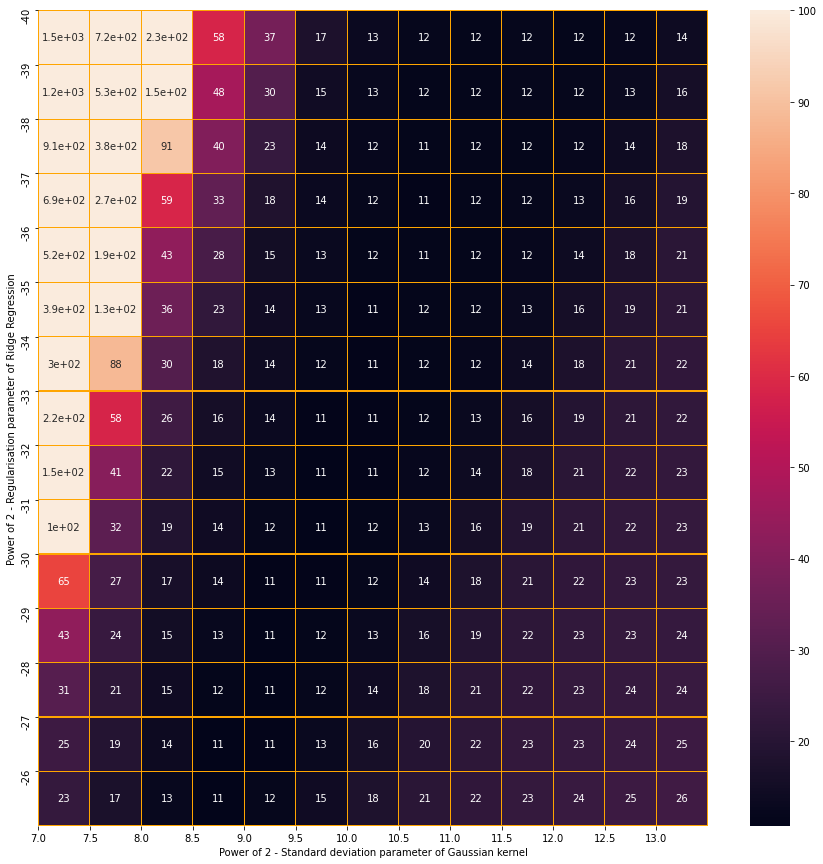

In [266]:
plt.figure(figsize=[15,15])
sbn.heatmap(grid,vmax=100,annot=True,linewidth=0.2,linecolor="orange")
plt.xlabel("Power of 2 - Standard deviation parameter of Gaussian kernel")
plt.ylabel("Power of 2 - Regularisation parameter of Ridge Regression")
plt.xticks(np.arange(0,13,1),np.arange(7,13.5,0.5))
plt.yticks(np.arange(0,15,1),np.arange(-40,-25,1))
plt.show()

### 1.3. c) Training and testing MSEs for the best combination of the standard deviation and regularisation parameter

In [282]:
lambda_indexes = np.arange(-40,-25,1)
gamma_indexes = np.arange(7,13.5,0.5)

print(f"The minimum cross-validation MSE was - {np.asarray(grid).min()}, which was achieved with the 2^{gamma_indexes[np.where(grid == np.asarray(grid).min())[1][0]]} standard deviation and the 2^{lambda_indexes[np.where(grid == np.asarray(grid).min())[0][0]]} regularisation parameter")

The minimum cross-validation MSE was - 10.765110061005043, which was achieved with the 2^8.5 standard deviation and the 2^-26 regularisation parameter


In [516]:
def train_and_test_ridge_regression_task_a(dataset): #the function trains and tests the kernelised ridge regression model based on the best performed parameters in the five-fold cross-validation
    train_mses = []
    test_mses = []

    train_x,train_y,test_x,test_y = train_test_split(dataset)
    train_x = np.asarray(train_x)
    train_y = np.asarray(train_y)
    test_x = np.asarray(test_x)
    test_y = np.asarray(test_y)

    kernel_matrix = np.asarray([[0.0]*train_x.shape[0] for x in range(train_x.shape[0])])
    for i in range(train_x.shape[0]):
        for j in range(train_x.shape[0]):
            kernel_matrix[i,j] = radial_gaussian_kernel(2**8.5,train_x[i,:],train_x[j,:])
    ker_rid_reg = KernelisedRidgeRegression()
    ker_rid_reg.fit(kernel_matrix,2**(-26),train_y)
    kernel_test = np.asarray([[0.0]*train_x.shape[0] for x in range(test_x.shape[0])])
    for i in range(train_x.shape[0]):
        for j in range(test_x.shape[0]):
            kernel_test[j,i] = radial_gaussian_kernel(2**8.5,train_x[i,:],test_x[j,:])

    train_mses.append(ker_rid_reg.mse(ker_rid_reg.predict(kernel_matrix).reshape(-1,1),train_y))
    test_mses.append(ker_rid_reg.mse(ker_rid_reg.predict(kernel_test).reshape(-1,1),test_y))
    
    return np.asarray(train_mses).mean(),np.asarray(test_mses).mean()

In [517]:
train_mse,test_mse = train_and_test_ridge_regression_task_a(dataset)
print(f"Training and testing MSEs for kernelised ridge regression: training - {train_mse}, testing - {test_mse}")

Training and testing MSEs for kernelised ridge regression: training - 8.522998488504824, testing - 9.664624151132736


### 1.3. d) Final results table

#### Naive regression

In [34]:
naive_train_mean,naive_test_mean,naive_train_std,naive_test_std = run_training_and_testing_part_a(dataset,20)

Naive regression predicts the mean of the median value of the owner-occupied homes training dataset: regression coefficient - [22.67091988], training mean median value - 22.67091988130564, testing mean median value - 22.257396449704142 for the last iteration 



#### Single attributes

In [327]:
attribute_train_mean,attribute_test_mean,attribute_train_std,attribute_test_std = run_training_and_testing_part_c(dataset,20)

#### All attributes

In [330]:
all_train_mean,all_test_mean,all_train_std,all_test_std = run_training_and_testing_part_d(dataset,20)

#### Kernelised Ridge Regression

In [524]:
def train_and_test_ridge_regression_task_d(dataset,iters):
    train_mses = []
    test_mses = []
    for iter in range(iters):

        grid = five_fold_cv(dataset)
        
        lambda_indexes = np.arange(-40,-25,1)
        gamma_indexes = np.arange(7,13.5,0.5)
        best_gamma = gamma_indexes[np.where(grid == np.asarray(grid).min())[1][0]]
        best_lambda = lambda_indexes[np.where(grid == np.asarray(grid).min())[0][0]]

        print(f"Best standard deviation - 2^{best_gamma}, best regularisation parameter - 2^{best_lambda}")

        train_x,train_y,test_x,test_y = train_test_split(dataset)
        train_x = np.asarray(train_x)
        train_y = np.asarray(train_y)
        test_x = np.asarray(test_x)
        test_y = np.asarray(test_y)

        kernel_matrix = np.asarray([[0.0]*train_x.shape[0] for x in range(train_x.shape[0])])
        for i in range(train_x.shape[0]):
            for j in range(train_x.shape[0]):
                kernel_matrix[i,j] = radial_gaussian_kernel(2**best_gamma,train_x[i,:],train_x[j,:])
        ker_rid_reg = KernelisedRidgeRegression()
        ker_rid_reg.fit(kernel_matrix,2**int(best_lambda),train_y)
        kernel_test = np.asarray([[0.0]*train_x.shape[0] for x in range(test_x.shape[0])])
        for i in range(train_x.shape[0]):
            for j in range(test_x.shape[0]):
                kernel_test[j,i] = radial_gaussian_kernel(2**best_gamma,train_x[i,:],test_x[j,:])

        train_mses.append(ker_rid_reg.mse(ker_rid_reg.predict(kernel_matrix).reshape(-1,1),train_y))
        test_mses.append(ker_rid_reg.mse(ker_rid_reg.predict(kernel_test).reshape(-1,1),test_y))
    
    return np.asarray(train_mses).mean(),np.asarray(test_mses).mean(),np.asarray(train_mses).std(),np.asarray(test_mses).std()

In [525]:
ridge_train_mean,ridge_test_mean,ridge_train_std,ridge_test_std = train_and_test_ridge_regression_task_d(dataset,20) #the outputs of the cell show the best parameters after each of the 20 iterations of five-fold cross-validation

Best standard deviation - 2^10.5, best regularisation parameter - 2^-40
Best standard deviation - 2^8.5, best regularisation parameter - 2^-34
Best standard deviation - 2^12.0, best regularisation parameter - 2^-39
Best standard deviation - 2^9.0, best regularisation parameter - 2^-28
Best standard deviation - 2^9.0, best regularisation parameter - 2^-28
Best standard deviation - 2^10.0, best regularisation parameter - 2^-38
Best standard deviation - 2^9.0, best regularisation parameter - 2^-27
Best standard deviation - 2^10.0, best regularisation parameter - 2^-31
Best standard deviation - 2^8.5, best regularisation parameter - 2^-27
Best standard deviation - 2^9.0, best regularisation parameter - 2^-30
Best standard deviation - 2^9.0, best regularisation parameter - 2^-27
Best standard deviation - 2^11.0, best regularisation parameter - 2^-39
Best standard deviation - 2^10.0, best regularisation parameter - 2^-39
Best standard deviation - 2^8.5, best regularisation parameter - 2^-26


#### Final table

In [554]:
results = pd.DataFrame(data=[["Naive Regression",naive_train_mean,naive_train_std,naive_test_mean,naive_test_std]])

In [555]:
for attr in attribute_train_mean:
    results = results.append([[attr,attribute_train_mean[attr],attribute_train_std[attr],attribute_test_mean[attr],attribute_test_std[attr]]])

In [556]:
results = results.append([["All attributes",all_train_mean,all_train_std,all_test_mean,all_test_std]])

In [557]:
results = results.append([["Kernelised Ridge Regression",ridge_train_mean,ridge_train_std,ridge_test_mean,ridge_test_std]])

In [558]:
results.columns = ["Model","Training MSE Mean","Traning MSE STD","Testing MSE Mean","Testing MSE STD"]
results.set_index("Model",inplace=True)

In [562]:
results.sort_values(by="Testing MSE Mean")

,Training MSE Mean,Traning MSE STD,Testing MSE Mean,Testing MSE STD
Model,,,,
Kernelised Ridge Regression,7.637125,1.543744,12.760292,2.855604
All attributes,21.790850,2.155927,25.105392,4.844989
LSTAT,37.793805,2.450823,40.196195,4.975290
RM,42.256293,2.820467,46.649483,5.710219
PTRATIO,61.454079,3.462396,65.536296,6.869007
INDUS,63.498407,5.129864,67.340480,10.389676
TAX,64.502252,5.142965,68.985894,10.461266
NOX,67.964710,5.230560,71.389857,10.560400
RAD,70.923790,5.149716,74.885415,10.497955
